In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 15.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a657ca5dd1268b6263d2c3b504340df1e7d389f8894c44b4a70fad6ecbdfa310
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
import pandas as pd
import numpy as np
import spacy
from __future__ import unicode_literals, print_function
from spacy.lang.en import English

from sentence_transformers import SentenceTransformer

from google.colab import output
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import nltk
import pickle

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import torch
torch.cuda.is_available()

False

In [4]:
data_path = '/content/drive/MyDrive/DATA_TALK/PROJECT/fake_job_postings.csv'

In [5]:
df = pd.read_csv(data_path)

In [6]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
df = df.dropna(how='any',axis=0).reset_index()

In [9]:
# departments = df['department'].unique()
# for d in departments:
#     print(d)
#     ids = df.loc[df['department'] == d].index.values
#     t = sents_df.loc[list(map(lambda x:x in ids, sents_df['text_id']))]['sent']

#     text = " ".join(t)
#     new_tokens = word_tokenize(text)

#     new_tokens = [t.lower() for t in new_tokens]
#     new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]

#     new_tokens = [t for t in new_tokens if t.isalpha()]
#     lemmatizer = WordNetLemmatizer()
#     new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]

#     counted = Counter(new_tokens)
#     word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
#     sns.barplot(x='frequency',y='word',data=word_freq.head(30))
#     plt.show()

In [10]:
df.groupby('title').count()['index'].sort_values(ascending=False).head(20)

title
Customer Service Representative                                  18
Systems Engineers/Network Administrators/Tiers I-III              8
Sales, Assistant Manager & Market Manager Positions Available     7
Sales Representative                                              7
Technical Support Associate                                       7
Sales Executive                                                   6
Marketing Associate                                               5
Graduate Summer Work Program -- Limited Openings -- Apply Now     5
Systems Engineer                                                  5
Marketing Manager                                                 5
Software Engineer                                                 4
Call Center Representative I                                      4
Web Developer                                                     4
Van Foreman / Driver - Class A                                    4
Content Marketer                          

In [11]:
# titles = df['title'].unique()
# for d in titles:
#     c = df.groupby('title').count()['index']
#     c = c.loc[c.index==d]
#     if c[0]>7:
#         print(d)
#         ids = df.loc[df['title'] == d].index.values
#         t = sents_df.loc[list(map(lambda x:x in ids, sents_df['text_id']))]
#         t = t.loc[t['is_requirement']==1]['sent']
#         text = " ".join(t)
#         print(text)
#         new_tokens = word_tokenize(text)

#         new_tokens = [t.lower() for t in new_tokens]
#         new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]

#         new_tokens = [t for t in new_tokens if t.isalpha()]
#         lemmatizer = WordNetLemmatizer()
#         new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]

#         counted = Counter(new_tokens)
#         word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
#         sns.barplot(x='frequency',y='word',data=word_freq.head(30))
#         plt.show()

In [12]:
#sents_df = pd.DataFrame(columns = ['text_id', 'sent_id', 'sent', 'is_requirement'])

In [13]:
df['company_profile']

0      Founded in 2009, the Fonpit AG rose with its i...
1      Jungle Ventures is the leading Singapore based...
2      WDM Group is an innovative, forward thinking d...
3                                                    ...
4      Renewable Energy and Environmental Protection ...
                             ...                        
769    Gary Cartwright established Cartwright Propert...
770    Gary Cartwright established Cartwright Propert...
771    Gary Cartwright established Cartwright Propert...
772    Balanced Labs exists to provide accountants an...
773    We're hiring!AvenueStory is a concept driven b...
Name: company_profile, Length: 774, dtype: object

In [14]:
# n = len(df)
# nlp = spacy.load('en_core_web_sm')


# for i in range(n):
#     n_s = 0
#     for feature in ['company_profile', 'description', 'requirements', 'benefits']:
#         print(feature,i)
#         raw_text = df[feature][i]
#         if not pd.isnull(raw_text):
#             t = nlp(raw_text).sents
#             for c in t:
#                 if len(c)>=3:
#                     s_df = pd.DataFrame()
#                     s_df['sent_id'] = [n_s]
#                     s_df['sent'] = [str(c)]
#                     s_df['text_id'] = [i]

#                     s_df['is_requirement'] = [1 if feature == 'requirements' else 0]

#                     sents_df = pd.concat([sents_df,s_df], ignore_index=True)
#                     n_s+=1

In [15]:
#sents_df.to_csv('/content/drive/MyDrive/DATA_TALK/PROJECT/sents.csv')

In [16]:
sents_df = pd.read_csv('/content/drive/MyDrive/DATA_TALK/PROJECT/sents.csv')

In [17]:
sents_df

,Unnamed: 0,text_id,sent_id,sent,is_requirement
0,0,0,0,"Founded in 2009, the Fonpit AG rose with its i...",0
1,1,0,1,Every month over 18 Million Android and tech e...,0
2,2,0,2,Our business activities consist of close colla...,0
3,3,0,3,"In 2014, APP MEDIA amended Fonpit AG’s brand p...",0
4,4,0,4,"As a one-stop shop for app marketing,APP MEDIA...",0
...,...,...,...,...,...
17201,17201,773,15,"Strong communication and people skills – warm,...",1
17202,17202,773,16,People trust you and you make them feel confid...,1
17203,17203,773,17,"Working within a small, young dynamic team in ...",0
17204,17204,773,18,"Occasional trips abroad, event invitations.",0


In [18]:
df['title'].unique()

array(['Head of Content (m/f)', 'VP of Sales - Vault Dragon',
       'Vice President, Sales and Sponsorship (Businessfriend.com)',
       'IC&E Technician', 'Marketing Administrator',
       'Senior Business Development Manager', 'Senior Project Manager',
       'Field Services Supervisor', 'Internal Recruiter',
       'Software developer', 'Junior Funding Specialist (Sales)',
       'IC&E Technician Mt Poso', 'Investor Sales Analyst',
       'Head of Communications', 'Risk Analyst',
       'Sales Representative with Management Training - DirecTV',
       'International Recruitment Manager',
       'Strategy Planning Supervisor with Direct Response',
       'Quality Assurance (QA) Engineer', 'Marketing Director',
       'Telemarketing professional',
       'Interviewing Now for Sales Rep Positions -- with Management Training',
       'Senior Client Service Manager', 'Key Account Manager',
       'Data Architect - Cloud and Scalability', 'Packing Expert - NYC',
       'UST Testing Techn

In [19]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [20]:
# embeddings = None
# n = len(sents_df)
# for i in range(n):
#     output.clear()
#     print(f'{round(i/n *100,2)} %')
#     text = sents_df['sent'][i]
#     emb = model.encode(text)
#     if embeddings is None:
#         embeddings = emb
#     else:
#         embeddings = np.vstack((embeddings, emb))

In [21]:
#np.savetxt('/content/drive/MyDrive/DATA_TALK/PROJECT/embeddings.txt', embeddings)

In [22]:
embeddings = np.loadtxt('/content/drive/MyDrive/DATA_TALK/PROJECT/embeddings.txt')

In [23]:
pca = PCA(n_components=2)
pca_2D = pca.fit_transform(embeddings)

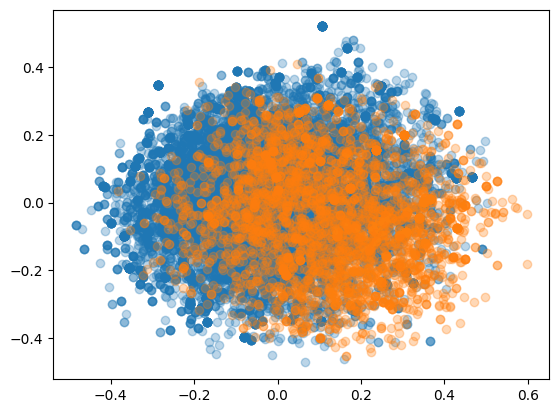

In [24]:
plt.scatter(pca_2D[sents_df['is_requirement']==0,0],pca_2D[sents_df['is_requirement']==0,1], alpha = 0.3)
plt.scatter(pca_2D[sents_df['is_requirement']==1,0],pca_2D[sents_df['is_requirement']==1,1], alpha = 0.3)

In [25]:
def get_freq(id):
    text = " ".join(sents_df.loc[sents_df['is_requirement']==id]['sent'].values)
    new_tokens = word_tokenize(text)

    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]

    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]

    counted = Counter(new_tokens)
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq

<Axes: xlabel='frequency', ylabel='word'>

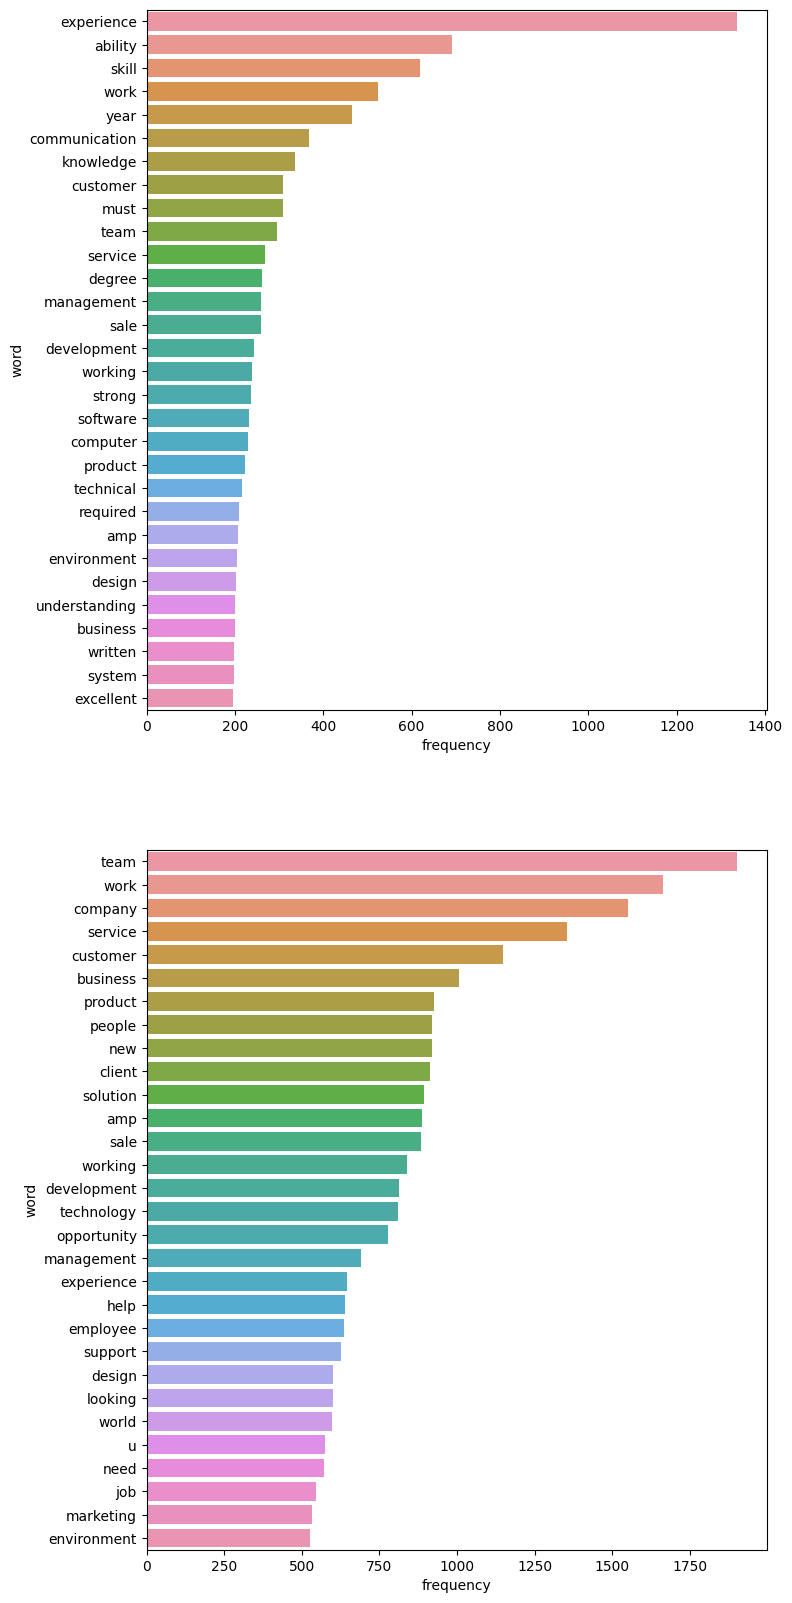

In [26]:
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0], x='frequency',y='word',data=get_freq(1).head(30))
sns.barplot(ax=axes[1], x='frequency',y='word',data=get_freq(0).head(30))

In [27]:
full_train_data, test_data = train_test_split(sents_df, test_size = 0.20)
train_data, val_data = train_test_split(full_train_data, test_size = 0.25)

In [28]:
model_file = 'model1.bin'


In [29]:
X_train = embeddings[train_data['Unnamed: 0']]
y_train = train_data['is_requirement']

X_val = embeddings[val_data['Unnamed: 0']]
y_val = val_data['is_requirement']

In [30]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
X_val.shape

(3441, 384)

In [32]:
y_pred = model.predict_proba(X_val)[:, 1]

In [33]:
thresholds  = np.linspace(0, 1-0.01, 100)
precision  = np.ones(len(thresholds))
recall  = np.ones(len(thresholds))
for i in range(len(thresholds)):
    precision[i] = precision_score (y_val, y_pred >= thresholds[i])
    recall[i] = recall_score(y_val, y_pred >= thresholds[i])

In [34]:
best_threshold_id = 0
for i in range(len(thresholds)-1):
    if (abs(precision[i]-recall[i]))<(abs(precision[best_threshold_id]-recall[best_threshold_id])):
        best_threshold_id = i

best_threshold = thresholds[best_threshold_id]

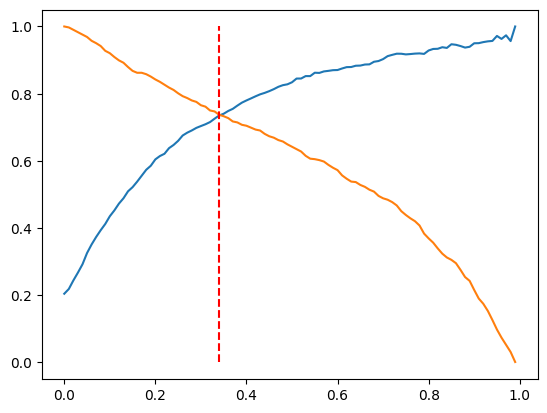

In [35]:

plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
plt.plot([best_threshold,best_threshold],[0,1],'--r')

In [36]:
f1  = np.zeros(len(thresholds))
for i in range(len(thresholds)):
    f1[i] = f1_score(y_val,y_pred >= thresholds[i])

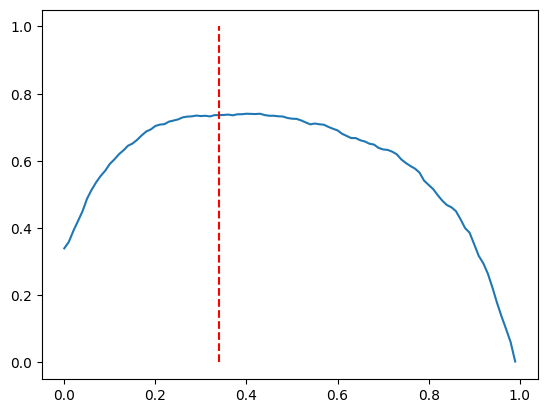

In [37]:
plt.plot(thresholds,f1)
plt.plot([best_threshold,best_threshold],[0,1],'--r')


0.01 0.6923615977575333 [0.6923615977575333]
0.1 0.724679029957204 [0.6923615977575333, 0.724679029957204]
0.5 0.7303609341825902 [0.6923615977575333, 0.724679029957204, 0.7303609341825902]
1 0.7361702127659574 [0.6923615977575333, 0.724679029957204, 0.7303609341825902, 0.7361702127659574]
5 0.7374380750176928 [0.6923615977575333, 0.724679029957204, 0.7303609341825902, 0.7361702127659574, 0.7374380750176928]
10 0.7407932011331444 [0.6923615977575333, 0.724679029957204, 0.7303609341825902, 0.7361702127659574, 0.7374380750176928, 0.7407932011331444]
15 0.7450424929178471 [0.6923615977575333, 0.724679029957204, 0.7303609341825902, 0.7361702127659574, 0.7374380750176928, 0.7407932011331444, 0.7450424929178471]
20 0.7416843595187543 [0.6923615977575333, 0.724679029957204, 0.7303609341825902, 0.7361702127659574, 0.7374380750176928, 0.7407932011331444, 0.7450424929178471, 0.7416843595187543]


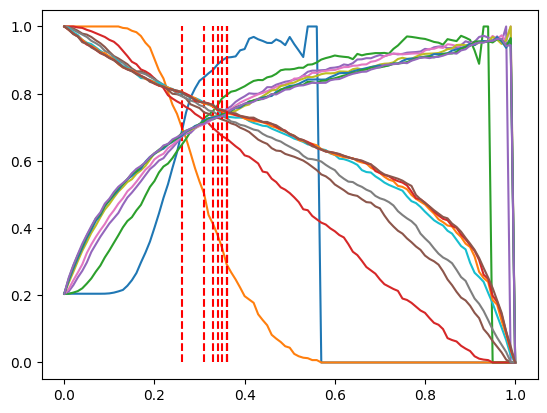

In [38]:
import warnings
warnings.filterwarnings('ignore')
scores = []
best_thresholds = []
for C in [0.01, 0.1, 0.5, 1, 5, 10, 15, 20]:

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    thresholds  = np.linspace(0, 1, 101)
    precision  = np.zeros(len(thresholds))
    recall  = np.zeros(len(thresholds))
    for i in range(len(thresholds)):
        precision[i] = precision_score(y_val, y_pred >= thresholds[i])
        recall[i] = recall_score(y_val, y_pred >= thresholds[i])

    best_threshold_id = 0
    for i in range(len(thresholds)//2):
        if (abs(precision[i]-recall[i]))<(abs(precision[best_threshold_id]-recall[best_threshold_id])):
            best_threshold_id = i

    best_threshold = thresholds[best_threshold_id]
    scores.append(f1_score(y_val, y_pred >= best_threshold))
    best_thresholds.append(best_threshold)
    print(C,f1_score(y_val, y_pred >= best_threshold),scores)
    plt.plot(thresholds,precision)
    plt.plot(thresholds,recall)
    plt.plot([best_threshold,best_threshold],[0,1],'--r')

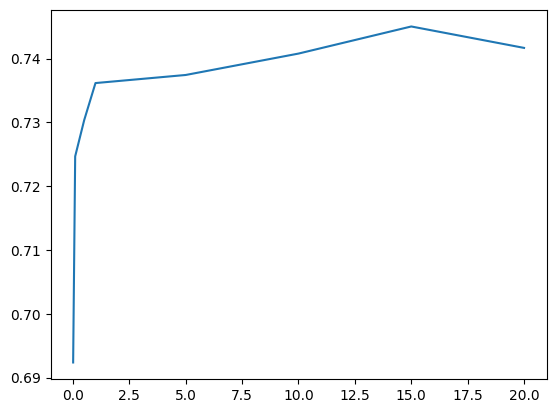

In [39]:
plt.plot([0.01, 0.1, 0.5, 1, 5, 10, 15, 20],scores)

In [40]:
X_full_train = embeddings[full_train_data['Unnamed: 0']]
y_full_train = full_train_data['is_requirement']

X_test = embeddings[test_data['Unnamed: 0']]
y_test = test_data['is_requirement']

MODEL = LogisticRegression(solver='liblinear', C=10, max_iter=1000)
MODEL.fit(X_train,y_train)

y_pred = MODEL.predict_proba(X_test)[:, 1]
y_pred = y_pred>best_thresholds[5]

In [41]:
model_file = '/content/drive/MyDrive/DATA_TALK/PROJECT/model1.bin'

In [42]:
with open(model_file,'wb') as f:
    pickle.dump(MODEL, f)

In [43]:
with open(model_file, 'rb') as f_in:
    model = pickle.load(f_in)

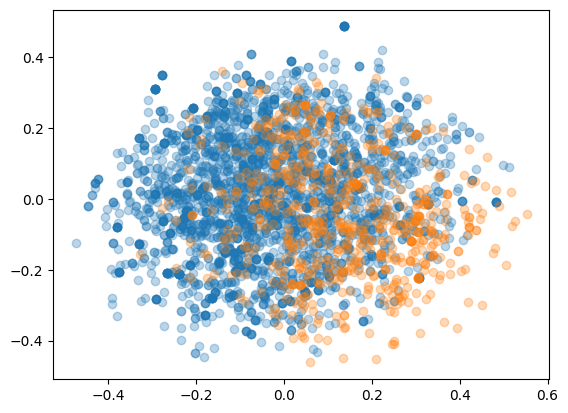

In [44]:
pca = PCA(n_components=2)
pca_2D = pca.fit_transform(X_test)
plt.scatter(pca_2D[y_pred==0,0],pca_2D[y_pred==0,1], alpha = 0.3)
plt.scatter(pca_2D[y_pred==1,0],pca_2D[y_pred==1,1], alpha = 0.3)

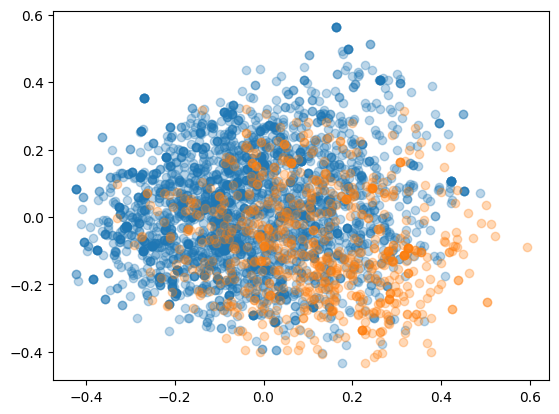

In [110]:
pca = PCA(n_components=2)
pca_2D = pca.fit_transform(X_test)
plt.scatter(pca_2D[y_test==0,0],pca_2D[y_test==0,1], alpha = 0.3)
plt.scatter(pca_2D[y_test==1,0],pca_2D[y_test==1,1], alpha = 0.3)

In [51]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [52]:
dtc = DecisionTreeClassifier(max_depth=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [53]:
y_pred = dtc.predict(X_val)

In [54]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
y_val

3683     0
13599    0
2026     0
3530     0
4911     0
        ..
15322    0
3838     0
14909    0
12551    0
2345     0
Name: is_requirement, Length: 3441, dtype: int64

In [158]:
f1_score(y_val,y_pred)

0.0

In [57]:
depths = np.arange(1,21,1)

In [58]:
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [67]:
scores = np.zeros(len(depths))
precision  = np.zeros(len(depths))
recall  = np.zeros(len(depths))

for i in range(len(depths)):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    n = 0
    for train_idx, val_idx in kfold.split(full_train_data):
        n+=1
        print(train_idx)
        X_train = embeddings[full_train_data.iloc[train_idx]['Unnamed: 0']]
        y_train = full_train_data.iloc[train_idx]['is_requirement']

        X_val = embeddings[full_train_data.iloc[val_idx]['Unnamed: 0']]
        y_val = full_train_data.iloc[val_idx]['is_requirement']

        dtc = DecisionTreeClassifier(max_depth=depths[i])
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_val)
        scores[i] +=f1_score(y_val,y_pred)
        precision[i] += precision_score (y_val, y_pred)
        recall[i] += recall_score(y_val, y_pred)
    scores[i] /=n
    precision[i] /= n
    recall[i] /= n

[    0     1     2 ... 13760 13761 13762]
[    0     1     2 ... 13761 13762 13763]
[    0     2     4 ... 13761 13762 13763]
[    0     1     2 ... 13758 13760 13763]
[    1     3     4 ... 13761 13762 13763]
[    0     1     2 ... 13760 13761 13762]
[    0     1     2 ... 13761 13762 13763]
[    0     2     4 ... 13761 13762 13763]
[    0     1     2 ... 13758 13760 13763]
[    1     3     4 ... 13761 13762 13763]
[    0     1     2 ... 13760 13761 13762]
[    0     1     2 ... 13761 13762 13763]
[    0     2     4 ... 13761 13762 13763]
[    0     1     2 ... 13758 13760 13763]
[    1     3     4 ... 13761 13762 13763]
[    0     1     2 ... 13760 13761 13762]
[    0     1     2 ... 13761 13762 13763]
[    0     2     4 ... 13761 13762 13763]
[    0     1     2 ... 13758 13760 13763]
[    1     3     4 ... 13761 13762 13763]
[    0     1     2 ... 13760 13761 13762]
[    0     1     2 ... 13761 13762 13763]
[    0     2     4 ... 13761 13762 13763]
[    0     1     2 ... 13758 13760

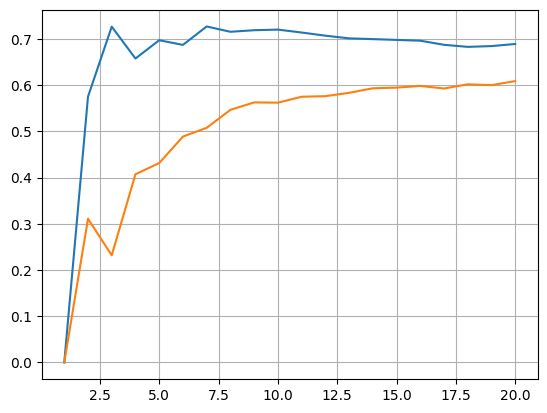

In [68]:
plt.plot(depths, precision)
plt.plot(depths, recall)
plt.grid()

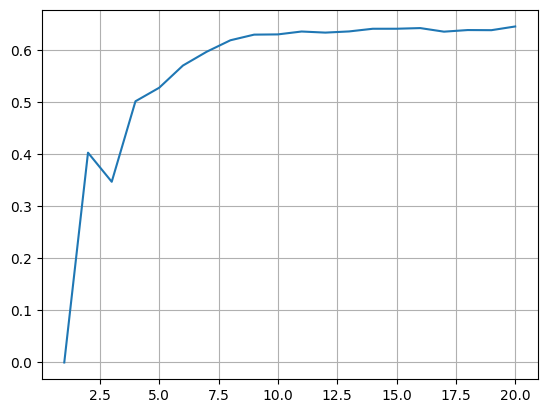

In [69]:
plt.plot(depths, scores)
plt.grid()

In [89]:
n_estimators = np.arange(10,210,10)
best_n = 0
scores = np.zeros(len(n_estimators))
precision  = np.zeros(len(n_estimators))
recall  = np.zeros(len(n_estimators))
for i in range(len(n_estimators)):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    n = 0
    for train_idx, val_idx in kfold.split(full_train_data):
        n+=1
        X_train = embeddings[full_train_data.iloc[train_idx]['Unnamed: 0']]
        y_train = full_train_data.iloc[train_idx]['is_requirement']

        X_val = embeddings[full_train_data.iloc[val_idx]['Unnamed: 0']]
        y_val = full_train_data.iloc[val_idx]['is_requirement']

        rfc = RandomForestClassifier(n_estimators = n_estimators[i],random_state = 42)
        dtc.fit(X_train, y_train)

        y_pred = dtc.predict(X_val)
        scores[i] += f1_score(y_val,y_pred)
        precision[i] += precision_score (y_val, y_pred)
        recall[i] += recall_score(y_val, y_pred)
    scores[i] /=n
    precision[i] /= n
    recall[i] /= n

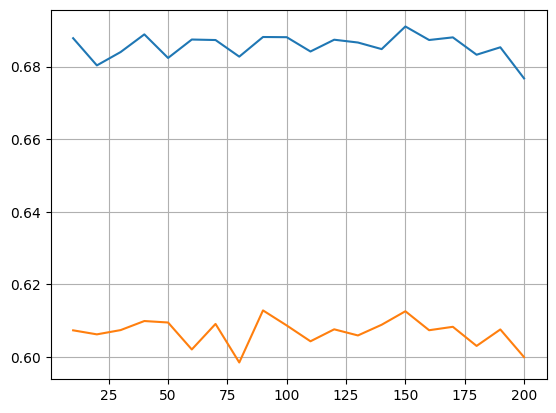

In [86]:
plt.plot(n_estimators, precision)
plt.plot(n_estimators, recall)
plt.grid()

In [90]:
print(max(scores))

0.6485350194873535


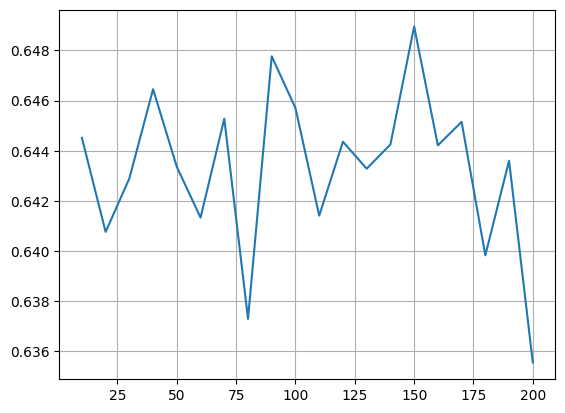

In [88]:
plt.plot(n_estimators, scores)
plt.grid()

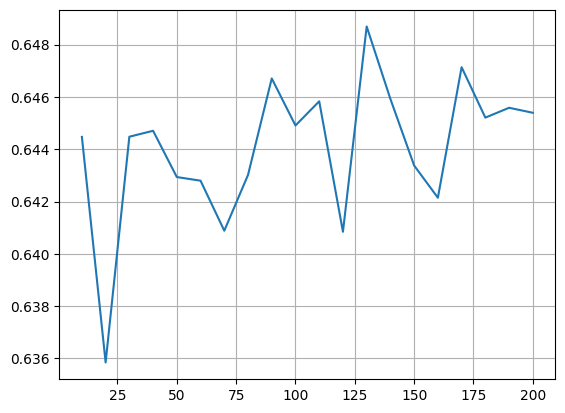

In [83]:
plt.plot(n_estimators, scores)
plt.grid()

In [47]:
n_estimators = np.arange(10,210,10)
best_n = 0
best_rmse = np.inf
for n in n_estimators:
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    n = 0
    for train_idx, val_idx in kfold.split(full_train_data):
        n+=1
        print(train_idx)
        X_train = embeddings[full_train_data.iloc[train_idx]['Unnamed: 0']]
        y_train = full_train_data.iloc[train_idx]['is_requirement']

        X_val = embeddings[full_train_data.iloc[val_idx]['Unnamed: 0']]
        y_val = full_train_data.iloc[val_idx]['is_requirement']
        rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        rmse = mean_squared_error(y_pred,y_val)**(1/2)
        print(f'n_estimators = {n} RMSE = {round(rmse,3)}')
        if rmse<best_rmse:
            best_rmse = rmse
            best_n = n

KeyboardInterrupt: ignored

In [ ]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: ignored

<Figure size 640x480 with 0 Axes>

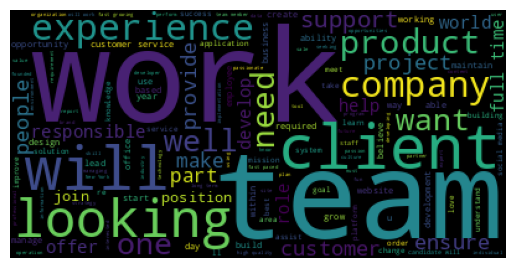

In [ ]:
text = ' '.join((sents_df.loc[sents_df['is_requirement']==0])['sent'].values)
wordcloud = WordCloud().generate(text)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
full_train_df, val_df = train_test_split(sents_df, train_size = )